In [1]:
import pickle, gzip, math, os, time, shutil, torch, matplotlib.pyplot as plt, numpy as np

In [3]:
import pandas as pd
import pathlib as Path
from torch.utils.data import DataLoader, default_collate
from typing import Mapping 

In [4]:
import datasets

/opt/anaconda3/envs/cv_project/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
with gzip.open('data/mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

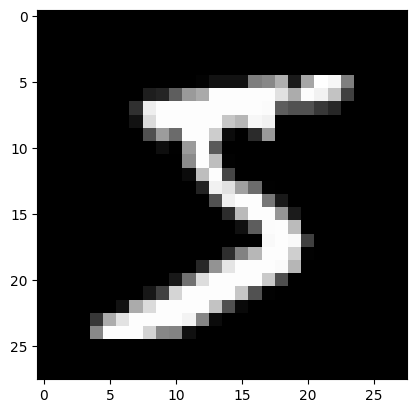

In [8]:
plt.imshow(x_train[0].view(28,28), cmap='gray')

In [11]:
sample_kernel = torch.randn(3, 3)
sample_kernel

tensor([[-1.2033,  0.2390, -0.2909],
        [-0.2974, -0.4140, -0.1224],
        [ 0.8749,  0.7032, -0.4567]])

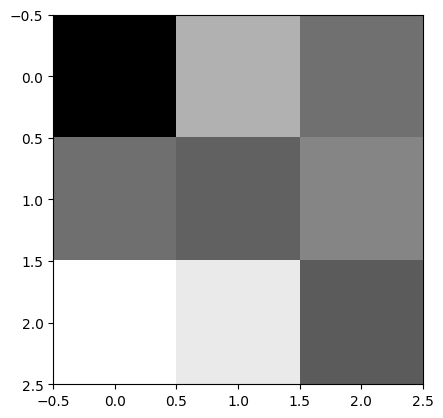

In [12]:
plt.imshow(sample_kernel, cmap='gray')

During training, we slide such kernels with learnable parameters across the input image, thereby capturing different aspects of the image.

In [21]:
def apply_kernel(x, row, col, kernel):
    return (x[row:row+kernel.shape[0], col:col+kernel.shape[1]] * kernel).sum()

In [22]:
x_train.shape

torch.Size([50000, 28, 28])

In [23]:
x_train = x_train.view(x_train.shape[0], 28, 28)
x_train.shape

torch.Size([50000, 28, 28])

In [24]:
apply_kernel(x_train[0], 0, 0, sample_kernel)

tensor(0.)